# Using CellTypist for cell type classification
This notebook showcases the cell type classification for scRNA-seq query data using either the built-in CellTypist models or the user-trained custom models.

## Install CellTypist

In [1]:
!pip install celltypist

In [2]:
import scanpy as sc

In [3]:
import celltypist
from celltypist import models

## Download a scRNA-seq dataset of 2,000 immune cells

In [4]:
adata_2000 = sc.read('celltypist_demo_folder/demo_2000_cells.h5ad', backup_url = 'https://celltypist.cog.sanger.ac.uk/Notebook_demo_data/demo_2000_cells.h5ad')

  0%|          | 0.00/29.4M [00:00<?, ?B/s]

This dataset includes 2,000 cells and 18,950 genes collected from different studies, thereby showing the practical applicability of CellTypist.

In [5]:
adata_2000.shape

(2000, 18950)

The expression matrix (`adata_2000.X`) is pre-processed (and required) as log1p normalized expression to 10,000 counts per cell (this matrix can be alternatively stashed in `.raw.X`).

In [6]:
adata_2000.X.expm1().sum(axis = 1)

matrix([[ 9999.996],
        [10000.   ],
        [10000.001],
        ...,
        [ 9999.999],
        [10000.001],
        [10000.   ]], dtype=float32)

Some pre-assigned cell type labels are also in the data, which will be compared to the predicted labels from CellTypist later.

In [7]:
adata_2000.obs

,cell_type
cell1,Plasmablasts
cell2,Plasmablasts
cell3,Plasmablasts
cell4,Plasmablasts
cell5,Plasmablasts
...,...
cell1996,NK cells
cell1997,NK cells
cell1998,NK cells
cell1999,NK cells


## Assign cell type labels using a CellTypist built-in model
In this section, we show the procedure of transferring cell type labels from built-in models to the query dataset.

Download the latest CellTypist models.

In [8]:
# Enabling `force_update = True` will overwrite existing (old) models.
models.download_models(force_update = True)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 34
📂 Storing models in /home/jovyan/.celltypist/data/models
💾 Downloading model [1/34]: Immune_Blood_Low.pkl
💾 Downloading model [2/34]: Immune_Upperairway_Low.pkl
💾 Downloading model [3/34]: Immune_Kidney_Low.pkl
💾 Downloading model [4/34]: Immune_All_Low.pkl
💾 Downloading model [5/34]: Immune_Upperairway_High.pkl
💾 Downloading model [6/34]: Immune_Mesentericlymphnode_High.pkl
💾 Downloading model [7/34]: Immune_Intestine_Low.pkl
💾 Downloading model [8/34]: Immune_Oesophagus_High.pkl
💾 Downloading model [9/34]: Immune_Colon_Low.pkl
💾 Downloading model [10/34]: Immune_Liver_Low.pkl
💾 Downloading model [11/34]: Immune_Thymus_Low.pkl
💾 Downloading model [12/34]: Immune_Lung_Low.pkl
💾 Downloading model [13/34]: Immune_Trachea_Low.pkl
💾 Downloading model [14/34]: Immune_Colon_High.pkl
💾 Downloading model [15/34]: Immune_Thymus_High.pkl
💾 Downloading model [16/34]: Immune_Spleen

All models are stored in `models.models_path`.

In [9]:
models.models_path

'/home/jovyan/.celltypist/data/models'

Get an overview of the models and what they represent.

In [10]:
models.models_description()

,model,description
0,Immune_Colon_Low.pkl,immune sub-populations from the colon
1,Immune_Liver_Low.pkl,immune sub-populations from the liver
2,Immune_All_Low.pkl,immune sub-populations combined from different...
3,Immune_Omentumadiposetissue_Low.pkl,immune sub-populations from the omentum adipos...
4,Immune_Mesentericlymphnode_Low.pkl,immune sub-populations from the mesenteric lym...
5,Immune_Blood_Low.pkl,immune sub-populations from the blood
6,Immune_Mesentericlymphnode_High.pkl,immune populations from the mesenteric lymph node
7,Immune_Oesophagus_High.pkl,immune populations from the oesophagus
8,Immune_Trachea_High.pkl,immune populations from the trachea
9,Immune_Kidney_High.pkl,immune populations from the kidney


Choose the model you want to employ, for example, the model with all tissues combined containing low-hierarchy (high-resolution) cell types/subtypes.

In [11]:
# Indeed, the `model` argument defaults to `Immune_All_Low.pkl`.
model = models.Model.load(model = 'Immune_All_Low.pkl')

This model contains 87 cell states.

In [12]:
model.cell_types

array(['B cells', 'CD8a/a', 'CD8a/b(entry)', 'CMP', 'Cycling B cells',
       'Cycling DCs', 'Cycling NK cells', 'Cycling T cells',
       'Cycling gamma-delta T cells', 'Cycling monocytes',
       'Cytotoxic T cells', 'DC', 'DC precursor', 'DC1', 'DC2', 'DC3',
       'Double-negative thymocytes', 'Double-positive thymocytes', 'ELP',
       'ETP', 'Early MK', 'Early erythroid', 'Early lymphoid/T lymphoid',
       'Endothelial cells', 'Epithelial cells', 'Erythrocytes',
       'Fibroblasts', 'Follicular B cells', 'Follicular helper T cells',
       'GMP', 'Germinal center B cells', 'Granulocytes', 'HSC/MPP',
       'Helper T cells', 'Hofbauer cells', 'ILC', 'ILC precursor', 'ILC1',
       'ILC2', 'ILC3', 'Immature B cells', 'Kidney-resident macrophages',
       'Kupffer cells', 'Late erythroid', 'MAIT cells', 'MEMP', 'MNP',
       'Macrophages', 'Mast cells', 'Megakaryocyte precursor',
       'Megakaryocyte-erythroid-mast cell progenitor',
       'Megakaryocytes/platelets', 'Memory B ce

Some model meta-information.

In [13]:
model.description

{'date': '2021-08-03 20:23:54.902884',
 'details': 'immune sub-populations combined from different organs/tissues',
 'url': 'https://celltypist.cog.sanger.ac.uk/models/v6/Immune_All_Low.pkl',
 'number_celltypes': 87}

Transfer cell type labels from this model to the query dataset.

In [14]:
# Enabling `majority_voting = True` will refine cell identities within local subclusters but increase the run time.
# There is also a `min_prop` parameter (defaults to 0) which controls the minimum proportion of cells from the dominant cell type required to name a given subcluster by this cell type.
# Turning off majority voting (`majority_voting = False`) will lead to raw predicted cell type labels only.
predictions = celltypist.annotate(adata_2000, model = model, majority_voting = True)

🔬 Input data has 2000 cells and 18950 genes
🔗 Matching reference genes in the model
🧬 7216 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


The results include both predicted cell identities (`predicted_labels`), and identities after over-clustering and majority voting (`majority_voting`).

In [15]:
predictions.predicted_labels

,predicted_labels,over_clustering,majority_voting
cell1,Plasmablasts,2,Plasmablasts
cell2,Plasmablasts,15,Plasmablasts
cell3,Germinal center B cells,19,Plasmablasts
cell4,Plasmablasts,19,Plasmablasts
cell5,Plasmablasts,15,Plasmablasts
...,...,...,...
cell1996,NK cells,3,NK cells
cell1997,NK cells,3,NK cells
cell1998,Cytotoxic T cells,3,NK cells
cell1999,NK cells,43,NK cells


Transform the prediction result into an `AnnData`.

In [16]:
# Get an `AnnData` with predicted labels embedded into the cell metadata column.
adata = predictions.to_adata()

Compared to `adata_2000`, the new `adata` has additional prediction information in `adata.obs` (`predicted_labels`, `over_clustering`, and `majority_voting`).

In [17]:
adata.obs

,cell_type,predicted_labels,over_clustering,majority_voting
cell1,Plasmablasts,Plasmablasts,2,Plasmablasts
cell2,Plasmablasts,Plasmablasts,15,Plasmablasts
cell3,Plasmablasts,Germinal center B cells,19,Plasmablasts
cell4,Plasmablasts,Plasmablasts,19,Plasmablasts
cell5,Plasmablasts,Plasmablasts,15,Plasmablasts
...,...,...,...,...
cell1996,NK cells,NK cells,3,NK cells
cell1997,NK cells,NK cells,3,NK cells
cell1998,NK cells,Cytotoxic T cells,3,NK cells
cell1999,NK cells,NK cells,43,NK cells


In addition to this meta information added, the neighborhood graph constructed during over-clustering is also stored in the `adata` 
(If a pre-calculated neighborhood graph is already present in the `AnnData`, this graph construction step will be skipped).  
This graph can be used to derive the cell embeddings, such as the UMAP coordinates.

In [18]:
# If the UMAP or any cell embeddings are already available in the `AnnData`, skip this command.
sc.tl.umap(adata)

Visualize the prediction results.

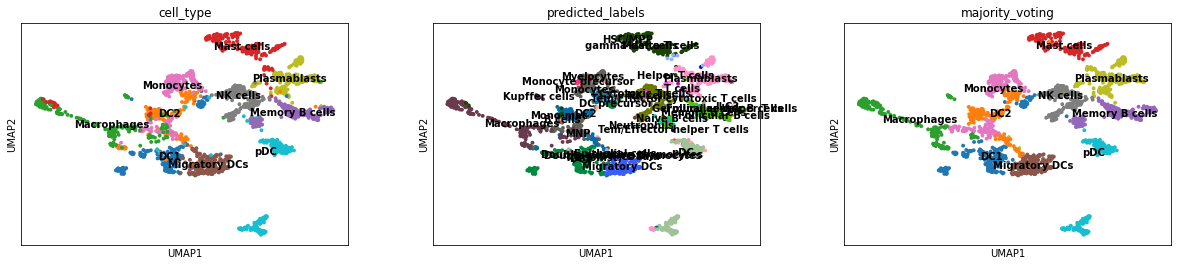

In [19]:
sc.pl.umap(adata, color = ['cell_type', 'predicted_labels', 'majority_voting'], legend_loc = 'on data')

Even there are potential batch effects separating cell types (for example, pDC), the cells can be still predicted correctly.

## Assign cell type labels using a custom model
In this section, we show the procedure of generating a custom model and transferring labels from the model to the query data.

Use previously downloaded dataset of 2,000 immune cells as the training set.

In [20]:
adata_2000 = sc.read('celltypist_demo_folder/demo_2000_cells.h5ad', backup_url = 'https://celltypist.cog.sanger.ac.uk/Notebook_demo_data/demo_2000_cells.h5ad')

Download another scRNA-seq dataset of 400 immune cells as a query.

In [21]:
adata_400 = sc.read('celltypist_demo_folder/demo_400_cells.h5ad', backup_url = 'https://celltypist.cog.sanger.ac.uk/Notebook_demo_data/demo_400_cells.h5ad')

  0%|          | 0.00/6.40M [00:00<?, ?B/s]

Derive a custom model by training the data using the `celltypist.train` function.

In [22]:
# Data training with SGD learning.
# The `cell_type` in `adata_2000.obs` will be used as cell type labels for training.
new_model = celltypist.train(adata_2000, labels = 'cell_type')

🍳 Preparing data before training
✂️ 2151 non-expressed genes are filtered out
⚖️ Scaling input data
🏋️ Training data using SGD logistic regression
✅ Model training done!


By default, data is trained using stochastic gradient descent (SGD) logistic regression without implementing the mini-batch approach. Among the training parameters, two important ones are `alpha` which sets the L2 regularization strength and `max_iter` which controls the maximum number of iterations before reaching the minimum of the cost function. Check out the `celltypist.train` for more information.

When the training data contains a large number of cells (for example >100k cells), you may consider using the mini-batch version of the SGD logistic regression classifier by specifying `mini_batch = True`. As a result, in each epoch cells are binned into equal-sized random batches, and are trained in a batch-by-batch manner. The parameters `batch_number`, `batch_size`, `epochs`, and `balance_cell_type` control the configuration of this training. Check out the `celltypist.train` for detailed information.

In [23]:
# Data training with SGD mini-batch training.
# For illustration purpose; below is not run for this small training data.
#new_model = celltypist.train(adata_2000, labels = 'cell_type', mini_batch = True)

This custom model can be manipulated as with other CellTypist built-in models. Here, we use it to predict the query dataset of 400 immune cells.

In [24]:
predictions = celltypist.annotate(adata_400, model = new_model, majority_voting = True)

🔬 Input data has 400 cells and 18950 genes
🔗 Matching reference genes in the model
🧬 16799 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 5
🗳️ Majority voting the predictions
✅ Majority voting done!


In [25]:
adata = predictions.to_adata()

In [26]:
sc.tl.umap(adata)

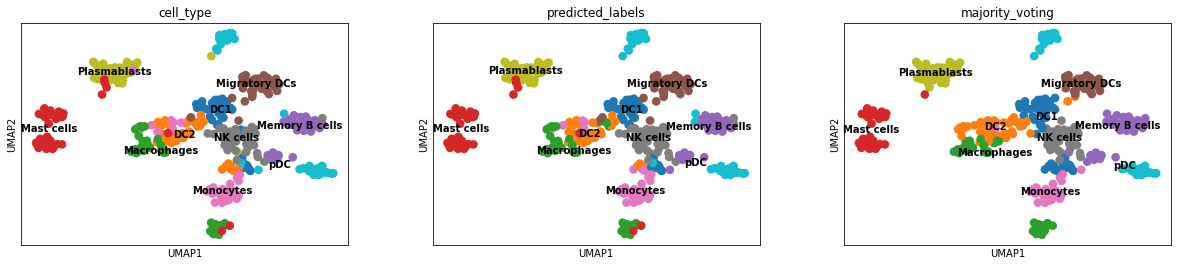

In [27]:
sc.pl.umap(adata, color = ['cell_type', 'predicted_labels', 'majority_voting'], legend_loc = 'on data')

Lastly, save this custom model for future use.

In [28]:
# Save the model.
new_model.write("celltypist_demo_folder/model_from_immune2000.pkl")

## Examine expression of cell type-driving genes

Each model can be examined in terms of the driving genes for each cell type. Note these genes are only dependent on the model, say, the training dataset.

In [29]:
# Any model can be inspected.
# Here we load the previously saved model trained from 2,000 immune cells.
model = models.Model.load(model = 'celltypist_demo_folder/model_from_immune2000.pkl')

In [30]:
model.cell_types

array(['DC1', 'DC2', 'Macrophages', 'Mast cells', 'Memory B cells',
       'Migratory DCs', 'Monocytes', 'NK cells', 'Plasmablasts', 'pDC'],
      dtype='<U14')

Extract the matrix of gene weights across cell types.

In [31]:
weights = model.classifier.coef_
weights.shape

(10, 16799)

Top three driving genes of `Mast cells`.

In [32]:
mast_cell_weights = weights[model.cell_types == 'Mast cells']
top_3_genes = model.features[mast_cell_weights.argpartition(-3, axis = None)[-3:]]
top_3_genes

array(['GATA2', 'CPA3', 'TPSAB1'], dtype=object)

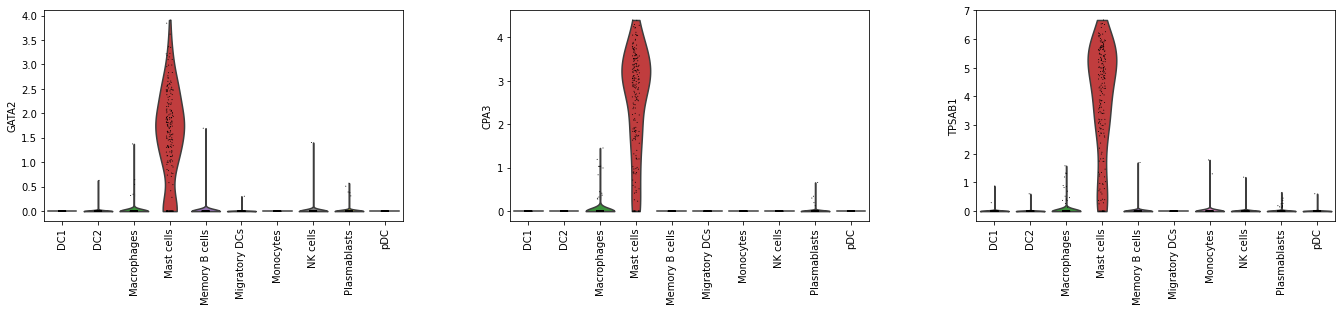

In [33]:
# Check expression of the three genes in the training set.
sc.pl.violin(adata_2000, top_3_genes, groupby = 'cell_type', rotation = 90)

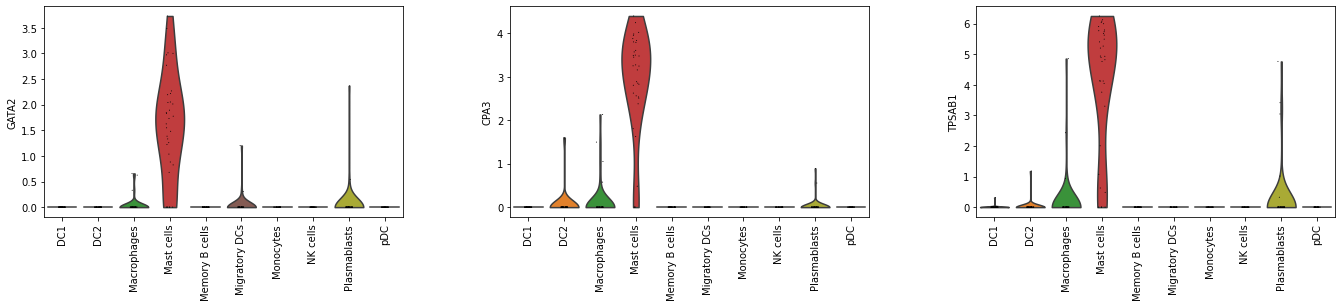

In [34]:
# Check expression of the three genes in the query set.
# Here we use `majority_voting` from CellTypist as the cell type labels for this dataset.
sc.pl.violin(adata_400, top_3_genes, groupby = 'majority_voting', rotation = 90)

## Further information
For further explanation of each step and parameter, please refer to [CellTypist](https://github.com/Teichlab/celltypist).